<a href="https://colab.research.google.com/github/dyahajengp/Pemrograman-Python/blob/main/14_Tugas%20Besar_Dyah%20Ajeng%20Pramudhita_1101191092.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : DYAH AJENG PRAMUDHITA | NIM : 1101191092 | KELAS : TT-43-G3**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f=1800 #MHz
f2=700 #MHz
f3=900 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
ptx=30000 #miliWatt
gtx=10 #db
grx=2 #db
bw=5000000 #Hz
d=np.random.randint(dmin,dmax,N)

# Pathloss

In [ ]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [ ]:
d_sort=d[np.argsort(d)]
print(d_sort)

[301 305 305 305 307 309 309 319 320 321 323 335 344 349 354 357 360 361
 362 363 370 380 386 389 394 396 401 402 402 403 403 404 404 404 405 407
 407 413 414 414 420 420 426 434 438 443 444 448 452 453 461 461 461 465
 473 476 485 487 489 491 494 495 499 502 503 506 515 516 517 522 526 533
 533 542 547 548 549 550 554 558 581 595 604 610 616 616 624 624 626 627
 636 639 639 641 656 659 660 661 665 668 670 671 673 675 680 680 688 688
 704 710 711 722 723 734 735 736 737 738 740 743 762 763 764 766 767 768
 768 775 776 777 779 786 791 793 793 793 796 807 808 813 818 823 825 826
 830 830 831 836 842 844 844 847 848 853 855 856 857 872 873 874 876 882
 885 885 890 891 892 892 893 896 900 906 908 908 911 916 917 920 922 929
 941 941 943 944 944 951 958 962 962 962 966 970 974 977 985 988 991 992
 997 999]


In [ ]:
Lp1=cos(f,loc1,tower,user,d_sort)
Lp2=cos(f,loc2,tower,user,d_sort)
Lp3=cos(f,loc3,tower,user,d_sort)

In [ ]:
Lpf=cos(f,loc1,tower,user,d_sort)
Lpf2=cos(f2,loc1,tower,user,d_sort)
Lpf3=cos(f3,loc1,tower,user,d_sort)

# Daya Terima

In [ ]:
# Ubah ptx dari numerik(miliWatt) ke logaritmik(dBm)
NtL = lambda x: 10*np.log10(x)
Ptx=NtL(ptx)
print(Ptx)

44.771212547196626


In [ ]:
def Pterima(Ptx,pl,gtx,grx):
  prx=Ptx-pl+gtx+grx

  # Ubah prx dari logaritmik(dBm) ke numerik(miliWatt)
  LtN = lambda x: 10**(x/10)
  Prx=LtN(prx)
  
  return Prx

In [ ]:
Prx1=Pterima(Ptx,Lp1,gtx,grx)
Prx2=Pterima(Ptx,Lp2,gtx,grx)
Prx3=Pterima(Ptx,Lp3,gtx,grx)

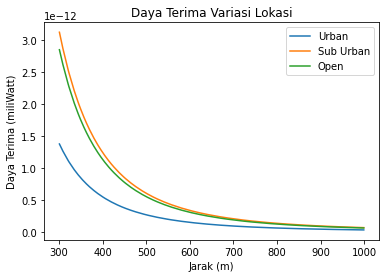

In [ ]:
# Grafik Daya Terima Variasi Lokasi dengan Frekuensi 1800MHz

plt.figure()
plt.plot(d_sort,Prx1, label='Urban')
plt.plot(d_sort,Prx2, label='Sub Urban')
plt.plot(d_sort,Prx3, label='Open')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.title("Daya Terima Variasi Lokasi")
plt.show()

In [ ]:
Prxf1=Pterima(Ptx,Lpf,gtx,grx)
Prxf2=Pterima(Ptx,Lpf2,gtx,grx)
Prxf3=Pterima(Ptx,Lpf3,gtx,grx)

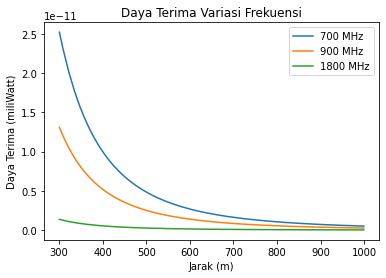

In [ ]:
# Grafik Daya Terima Variasi Frekuensi dengan Lokasi Urban

plt.figure()
plt.plot(d_sort,Prxf2, label='700 MHz')
plt.plot(d_sort,Prxf3, label='900 MHz')
plt.plot(d_sort,Prxf1, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.title("Daya Terima Variasi Frekuensi")
plt.show()

#  Signal to Noise Ratio (SNR)

In [ ]:
def snr(Prx,bw):
  no=-174+(10*np.log10(bw))
  No=LtN(no)
  SNR=Prx/No

  return(SNR)

In [ ]:
snr1=snr(Prx1,bw)
snr2=snr(Prx2,bw)
snr3=snr(Prx3,bw)

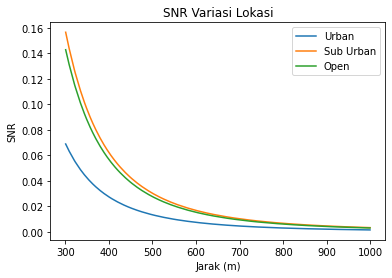

In [ ]:
# Grafik SNR Variasi Lokasi dengan Frekuensi 1800MHz

plt.figure()
plt.plot(d_sort,snr1, label='Urban')
plt.plot(d_sort,snr2, label='Sub Urban')
plt.plot(d_sort,snr3, label='Open')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.title("SNR Variasi Lokasi")
plt.show()

In [ ]:
snrf1=snr(Prxf1,bw)
snrf2=snr(Prxf2,bw)
snrf3=snr(Prxf3,bw)

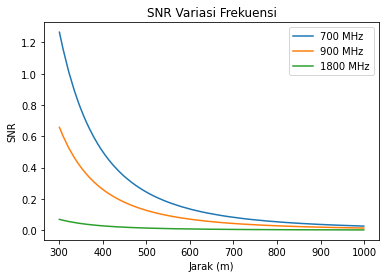

In [ ]:
# Grafik SNR Variasi Frekuensi dengan Lokasi Urban

plt.figure()
plt.plot(d_sort,snrf2, label='700 MHz')
plt.plot(d_sort,snrf3, label='900 MHz')
plt.plot(d_sort,snrf1, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.title("SNR Variasi Frekuensi")
plt.show()

# Kapasitas

In [ ]:
def kapasitas(SNR,bw):
  kpsts=bw*np.log2(1+SNR)

  return kpsts

In [ ]:
kpsts1=kapasitas(snr1,bw)
kpsts2=kapasitas(snr2,bw)
kpsts3=kapasitas(snr3,bw)

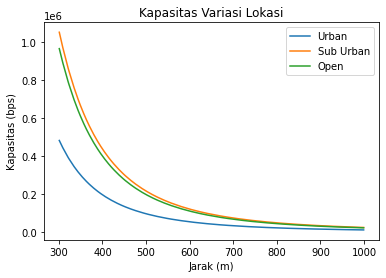

In [ ]:
# Grafik Kapasitas Variasi Lokasi dengan Frekuensi 1800MHz

plt.figure()
plt.plot(d_sort,kpsts1, label='Urban')
plt.plot(d_sort,kpsts2, label='Sub Urban')
plt.plot(d_sort,kpsts3, label='Open')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.title("Kapasitas Variasi Lokasi")
plt.show()

In [ ]:
kpstsf1=kapasitas(snrf1,bw)
kpstsf2=kapasitas(snrf2,bw)
kpstsf3=kapasitas(snrf3,bw)

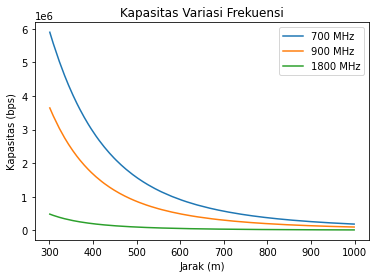

In [ ]:
# Grafik Kapasitas Variasi Frekuensi dengan Lokasi Urban

plt.figure()
plt.plot(d_sort,kpstsf2, label='700 MHz')
plt.plot(d_sort,kpstsf3, label='900 MHz')
plt.plot(d_sort,kpstsf1, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.title("Kapasitas Variasi Frekuensi")
plt.show()